# Vector manipulation in Python

At the end of the week3 module, we used PCA to transform a set of many variables into a set of only two uncorrelated variables. This process was made through a transformation of the data called rotation. 

Find a transformation matrix from English to French vector space embeddings. Such a transformation matrix is nothing else but a matrix that rotates and scales vector spaces.

In this notebook, we will explain in detail the rotation transformation. 

## Transforming vectors

There are three main vector transformations:
* Scaling
* Translation
* Rotation

In previous notebooks, we have applied the first two kinds of transformations. Now, let us learn how to use a fundamental transformation on vectors called _rotation_.

The rotation operation changes the direction of a vector, letting unaffected its dimensionality and its norm. Let us explain with some examples. 

In the following cells, we will define a NumPy matrix and a NumPy array. Soon we will explain how this is related to matrix rotation.

# np.dot meaning

If both a and b are 1-D arrays, it is inner product of vectors (without complex conjugation).

If both a and b are 2-D arrays, it is matrix multiplication, but using matmul or a @ b is preferred.

If either a or b is 0-D (scalar), it is equivalent to multiply and using numpy.multiply(a, b) or a * b is preferred.

If a is an N-D array and b is a 1-D array, it is a sum product over the last axis of a and b.

If a is an N-D array and b is an M-D array (where M>=2), it is a sum product over the last axis of a and the second-to-last axis of b:

In [6]:
np.dot(3, 4)

12

In [8]:
# If both a and b are 1-D arrays, it is inner product of vectors (without complex conjugation).
np.dot([2j, 3j], [2j, 3j])

(-13+0j)

In [15]:
# If both a and b are 2-D arrays, it is matrix multiplication, but using matmul or a @ b is preferred.
a= np.array([[1,0], [0,1]])
b= np.array([[4,1], [2,2]])
# np.dot(a,b)
# np.matmul(a,b)
# a@b

array([[4, 1],
       [2, 2]])

In [20]:
# If b is an N-D array and d is an M-D array (where M>=2), it is a sum product over the last axis of a and the second-to-last axis of b:
a = np.arange(3*4*5*6)
print(a)
b = a.reshape((3,4,5,6))
print(b)
c = a[::-1]
print(c)
d = c.reshape((5,4,6,3))
print(d)
print(np.dot(b, d))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [1]:
import numpy as np                     # Import numpy for array manipulation
import matplotlib.pyplot as plt        # Import matplotlib for charts
# from utils_nb import plot_vectors      # Function to plot vectors (arrows)

### Example 1

In [34]:
# Create a 2 x 2 matrix
R = np.array([[2, 0],
              [0, -2]])
R.ndim

2

In [35]:
x = np.array([[1, 1]]) # Create a 1 x 2 matrix
x.ndim

2

The dot product between a vector and a square matrix produces a rotation and a scaling of the original vector. 

Remember that our recommended way to get the dot product in Python is np.dot(a, b):

In [23]:
# y = np.dot(x, R) # Apply the dot product between x and R
# matrix multiplication
y= x@R
y

array([[ 2, -2]])

We are going to use Pyplot to inspect the effect of the rotation on 2D vectors visually. For that, we have created a function `plot_vectors()` that takes care of all the intricate parts of the visual formatting. The code for this function is inside the `utils_nb.py` file. 

Now we can plot the vector $\vec x = [1, 1]$ in a cartesian plane. The cartesian plane will be centered at `[0,0]` and its x and y limits will be between `[-4, +4]`

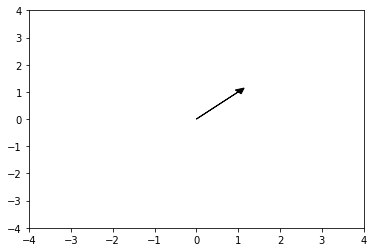

In [5]:
plot_vectors([x], axes=[4, 4], fname='transform_x.svg')

In [26]:
# Procedure to plot and arrows that represents vectors with pyplot
def plot_vectors(vectors, colors=['k', 'b', 'r', 'm', 'c'], axes=None, fname='image.svg', ax=None):
#     scale = 1
#     scale_units = 'x'
#     x_dir = []
#     y_dir = []
    
#     for i, vec in enumerate(vectors):
#         x_dir.append(vec[0][0])
#         y_dir.append(vec[0][1])
    
    if ax == None:
        fig, ax2 = plt.subplots()
    else:
        ax2 = ax
      
    if axes == None:
        x_axis = 2 + np.max(np.abs(x_dir))
        y_axis = 2 + np.max(np.abs(y_dir))
    else:
        x_axis = axes[0]
        y_axis = axes[1]
        
    ax2.axis([-x_axis, x_axis, -y_axis, y_axis])
        
    for i, vec in enumerate(vectors):
        ax2.arrow(0, 0, vec[0][0], vec[0][1], head_width=0.05 * x_axis, head_length=0.05 * y_axis, fc=colors[i], ec=colors[i])
    
    if ax == None:
        plt.show()
        fig.savefig(fname)


Now, let's plot in the same system our vector $\vec x = [1, 1]$ and its dot product with the matrix

$$Ro = \begin{bmatrix} 2 & 0 \\ 0 & -2 \end{bmatrix}$$

$$y = x \cdot Ro = [[-2, 2]]$$

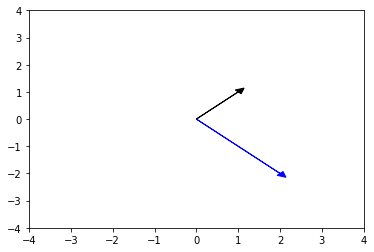

In [27]:
plot_vectors([x, y], axes=[4, 4], fname='transformx_and_y.svg')

Note that the output vector `y` (blue) is transformed in another vector. 

### Example 2

We are going to use Pyplot to inspect the effect of the rotation on 2D vectors visually. For that, we have created a function that takes care of all the intricate parts of the visual formatting. The following procedure plots an arrow within a Pyplot canvas.

Data that is composed of 2 real attributes is telling to belong to a $ RxR $ or $ R^2 $ space. Rotation matrices in $R^2$ rotate a given vector $\vec x$ by a counterclockwise angle $\theta$ in a fixed coordinate system. Rotation matrices are of the form:

$$Ro = \begin{bmatrix} cos \theta & -sin \theta \\ sin \theta & cos \theta \end{bmatrix}$$

The trigonometric functions in Numpy require the angle in radians, not in degrees. In the next cell, we define a rotation matrix that rotates vectors by $45^o$.

In [45]:
# Procedure to plot and arrows that represents vectors with pyplot
def plot_vectors(vectors, colors=['k', 'b', 'r', 'm', 'c'], axes=None, fname='image.svg', ax=None):
#     scale = 1
#     scale_units = 'x'
    x_dir = []
    y_dir = []
    
    for i, vec in enumerate(vectors):
        x_dir.append(vec[0][0])
        y_dir.append(vec[0][1])
    
    if ax == None:
        fig, ax2 = plt.subplots()
    else:
        ax2 = ax
      
    if axes == None:
        x_axis = 2 + np.max(np.abs(x_dir))
        y_axis = 2 + np.max(np.abs(y_dir))
    else:
        x_axis = axes[0]
        y_axis = axes[1]
        
    ax2.axis([-x_axis, x_axis, -y_axis, y_axis])
        
    for i, vec in enumerate(vectors):
        ax2.arrow(0, 0, vec[0][0], vec[0][1], head_width=0.05 * x_axis, head_length=0.05 * y_axis, fc=colors[i], ec=colors[i])
    
    if ax == None:
        plt.show()
        fig.savefig(fname)

0.7853981633974483
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[2 2]]
[[2.82842712 0.        ]]


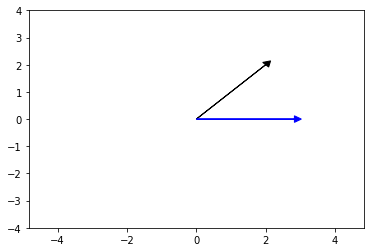

In [52]:
# angle = 100 * (np.pi / 180) #convert degrees to radians
# print(angle)
angle= np.radians(45)
print(angle)
Ro = np.array([[np.cos(angle), -np.sin(angle)],
              [np.sin(angle), np.cos(angle)]])

print(Ro)
# x2 = np.array([2, 2]).reshape(1, -1) # make it a row vector
x2= np.array([[2,2]])
y2 = np.dot(x2, Ro)
print(x2)
# print(x2.ndim)
print(y2)
# print(y2.ndim)
plot_vectors([x2, y2], fname='transform_02.svg')

1.7453292519943295
[[-0.17364818 -0.98480775]
 [ 0.98480775 -0.17364818]]
[[2 2]]
[[ 1.62231915 -2.31691186]]


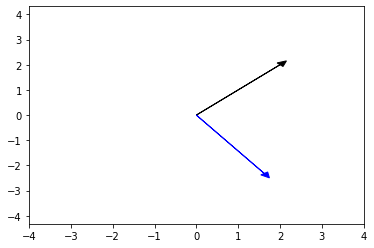

In [51]:
angle = 100 * (np.pi / 180) #convert degrees to radians
print(angle)
Ro = np.array([[np.cos(angle), -np.sin(angle)],
              [np.sin(angle), np.cos(angle)]])

print(Ro)
# x2 = np.array([2, 2]).reshape(1, -1) # make it a row vector
x2= np.array([[2,2]])
y2 = np.dot(x2, Ro)
print(x2)
# print(x2.ndim)
print(y2)
# print(y2.ndim)
plot_vectors([x2, y2], fname='transform_02.svg')

In [9]:
print('Rotation matrix')
print(Ro)
print('\nRotated vector')
print(y2)

Rotation matrix
[[-0.17364818 -0.98480775]
 [ 0.98480775 -0.17364818]]

Rotated vector
[[ 1.62231915 -2.31691186]]


In [10]:
print('\n x2 norm', np.linalg.norm(x2))
print('\n y2 norm', np.linalg.norm(y2))
print('\n Rotation matrix norm', np.linalg.norm(Ro))


 x2 norm 2.8284271247461903

 y2 norm 2.82842712474619

 Rotation matrix norm 1.414213562373095


Some points to note:

* The norm of the input vector is the same as the norm of the output vector. Rotations matrices do not modify the norm of the vector, only its direction.
* The norm of any $R^2$ rotation matrix is always $\sqrt 2 = 1.414221$

## Frobenius Norm

The Frobenius norm is the generalization to $R^2$ of the already known norm function for vectors 

$$\| \vec a \| = \sqrt {{\vec a} \cdot {\vec a}} $$

For a given $R^2$ matrix A, the frobenius norm is defined as:

$$\|\mathrm{A}\|_{F} \equiv \sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n}\left|a_{i j}\right|^{2}}$$


In [9]:
A = np.array([[2, 2],
              [2, 2]])

`np.square()` is a way to square each element of a matrix. It must be equivalent to use the * operator in Numpy arrays.

In [10]:
A_squared = np.square(A)
A_squared

array([[4, 4],
       [4, 4]])

Now you can sum over the elements of the resulting array, and then get the square root of the sum.

In [11]:
A_Frobenius = np.sqrt(np.sum(A_squared))
A_Frobenius

4.0

That was the extended version of the `np.linalg.norm()` function. You can check that it yields the same result.

In [12]:
print('Frobenius norm of the Rotation matrix')
print(np.sqrt(np.sum(Ro * Ro)), '== ', np.linalg.norm(Ro))

Frobenius norm of the Rotation matrix
1.414213562373095 ==  1.414213562373095


**Congratulations!! We've covered a few more matrix operations in this lab. This will come in handy in this week's programming assignment!**